# Udemy Data Science Algorithm Exercise

## PART A: Course Classification

I'm going to handle this problem in 2 ways. It could be:

1. Traditional Machine Learning Approach
2. Transformer Based Model(Attached in Seperate Notebook)

## Traditional Machine Learning Approach

In this approach, I'm going to follow a general procedure outlined below:

1. **Exploratory Data Analysis**

2. **Preprocessing**

3. **Vectorization**

4. **Balancing Classes**

5. **Building Model**

6. **Evaluation**


In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Data into DataFrame
data = pd.read_csv("udemy_ds_algos_exercise (1).csv")
data.head()

,courseid,course_section_lecture_title,label
0,8416,Beginners - How To Create iPhone And iPad Apps...,iOS Development
1,8723,"C Programming: iOS Development Starts Here!, {...",iOS Development
2,9287,Microsoft Excel 2010 Course Beginners/ Interme...,Excel
3,9463,Programming Java for Beginners - The Ultimate ...,Java
4,10318,"Adobe Photoshop for Photographers, {Color Corr...",Photoshop


In [3]:
#Checking for Nulls
data.isnull().sum()


courseid                        0
course_section_lecture_title    0
label                           0
dtype: int64

### Analyzing the Classes in the Data

/var/folders/1g/y6ytm1ln1d51mrxq2mnyy1b00000gn/T/ipykernel_15084/3492218691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


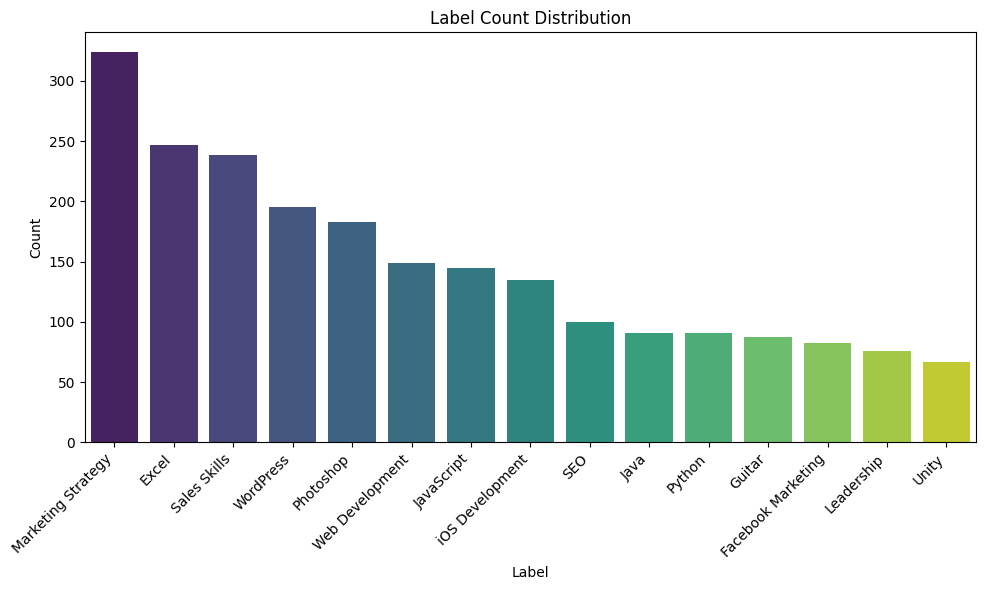

In [4]:
# Count the frequency of each label
label_counts = data['label'].value_counts()
# Plot the label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Count Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Label Encoding and Mapping Process

This step ensures that the data is properly formatted and encoded for training the machine learning model.


In [5]:
# Preprocess the data
data = data.rename(columns={"course_section_lecture_title": "text", "label": "label"})
labels = data['label'].unique()
label2id = {label: idx for idx, label in enumerate(labels)}
id2label = {idx: label for label, idx in label2id.items()}
data['label'] = data['label'].map(label2id)

### Splitting of Data

Splitting Test and Traning data into 80/20 split 

In [6]:
# Split the data
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)


### Vectorizing the Data

This step involves converting the text data into numerical vectors.


In [7]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2),stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Addressing Imbalanced Classes

Since the dataset exhibits imbalanced classes, employing techniques like oversampling and undersampling can help balance the classes and potentially improve model accuracy.


In [8]:
# Apply SMOTE for oversampling and RandomUnderSampler for undersampling
smote = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=100)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)
X_train_res, y_train_res = under_sampler.fit_resample(X_train_res, y_train_res)

### Initializing the Logistc Regression Model.
- Adjusting the Class Weight to Balanced will assist the model to handle the imbalance classes in the dataset.


Why Logistic Regression?
Assumptions:
- Easily interpretable results
- As the classes are linear separable Logistic Regression will work well. 


In [9]:
# Initialize logistic regression with class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000)

### Prediction and Evaluation

#### Insights:

- If the model has high recall but low precision, users might encounter a lot of irrelevant courses, leading to dissatisfaction. Thus, high precision might be more critical here.
- Conversely, if it's more important to ensure that every relevant course is correctly identified and shown, even if some irrelevant ones are included, then recall would be more critical.

Hence, balancing precision and recall, slightly prioritizing precision, is important. Evaluating the model using precision as the priority.


In [10]:
# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=labels)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.81
Classification Report:
                    precision    recall  f1-score   support

   iOS Development       1.00      0.89      0.94        27
             Excel       1.00      1.00      1.00        49
              Java       0.90      1.00      0.95        18
         Photoshop       0.95      0.95      0.95        37
         WordPress       0.88      0.74      0.81        39
               SEO       0.67      0.80      0.73        20
            Python       1.00      0.78      0.88        18
Marketing Strategy       0.74      0.71      0.72        65
Facebook Marketing       0.62      0.76      0.68        17
   Web Development       0.51      0.67      0.58        30
      Sales Skills       0.71      0.81      0.76        48
        JavaScript       0.83      0.66      0.73        29
            Guitar       0.94      1.00      0.97        17
        Leadership       0.90      0.60      0.72        15
             Unity       0.92      0.92      0.92        13



### Next Steps:

1. **Adjusting the Decision Threshold based on the AUC/ROC Curve.**
   
2. **Hyperparameter Tuning.**
   
3. **Analyzing the Classes Individually to balance the classes.**
